In [4]:
# 전이 학습

# 훈련된 모델의 가중치를 가져와 우리가 해결하려는 과제에 맞게 보정하여 사용 하는 것.
# 사전 훈련된 네트워크 = 아주 큰 데이터 셋을 사용하여 훈련된 모델

In [5]:
# 특성 추출 기법

# 사전 훈련된 네트워크의 합성곱층에 가중치를 고정한 채 새로운 데이터를 통과시키고 그 출력을 데이터 분류기에서 훈련시킴.


In [6]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as pl
import matplotlib.image as mpimg

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalMaxPool2D, GlobalAveragePooling2D
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
md = ResNet50(include_top = True,     # 네트워크 상단에 완전연결층을 포함할지 여부
             weights = "imagenet",    # 가중치 (None = 무작위 초기화, imagenet = imagenet에서 사전 훈련된 값)
             input_tensor = None,     # 입력데이터의 텐서
             input_shape = None,      # 입력이미지에 대한 텐서 크기
             pooling = None,          # None = 마지막 합성곱층 출력, avg / max = 마지막 합성곱층을 글로벌 평균 / 최대 풀링
             classes = 1000)          # imagenet 가중치를 사용하기 위해서는 1000 이어야한다.

# 텐서 = 데이터의 배열 / 텐서 랭크 = 배열의 차원 수

In [8]:
md.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [9]:
md.trainable = False
md = Sequential([md, Dense(2, activation = 'sigmoid')])    # 시그모이드 함수가 포함된 밀집층 추가

In [10]:
md.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 1000)              25636712  
_________________________________________________________________
dense (Dense)                (None, 2)                 2002      
Total params: 25,638,714
Trainable params: 2,002
Non-trainable params: 25,636,712
_________________________________________________________________


In [11]:
md.compile(loss = "binary_crossentropy", optimizer = 'adam', metrics = ['accuracy'])   # 환경설정

In [12]:
batch = 32
img_h = 224
img_w = 224
train = "./source/chap5/data/catanddog/train"
valid = "./source/chap5/data/catanddog/validation"

tr = ImageDataGenerator(
                    rescale = 1/255,                # 정규화
                    rotation_range = 10,            # 회전, 기울기 (0 ~ 10도 사이에서 회전)
                    width_shift_range = 0.1,        # 수평으로 랜덤하게 평행이동
                    height_shift_range = 0.1,       # 수직으로 랜덤하게 평행이동
                    shear_range = 0.1,              # 0.1 라디안 내외로 시계 반대 방향으로 이미지를 변환
                    zoom_range = 0.1                # 0.1 만큼 확대
)

tr_generator = tr.flow_from_directory(
                    train,                          # 훈련 이미지 경로
                    target_size = (img_h, img_w),   # 이미지 크기 설정
                    color_mode = "rgb",             # 흑백 혹은 컬러
                    batch_size = batch,             # 배치당 generator에서 생성할 이미지 개수
                    seed = 7,                       # 임의의 난수 설정값
                    shuffle = True,                 # 이미지를 섞어서 사용
                    class_mode = "categorical")     # 예측할 클래스가 두개라면 binary 그렇지 않으면 categorical

vl = ImageDataGenerator( rescale = 1.0/255.0 )

vl_generator = vl.flow_from_directory(
                    valid,                          # 검정 이미지 경로
                    target_size = (img_h, img_w),   # 이미지 크기 설정
                    color_mode = "rgb",             # 흑백 혹은 컬러
                    batch_size = batch,             # 배치당 generator에서 생성할 이미지 개수
                    seed = 7,                       # 임의의 난수 설정값
                    shuffle = True,                 # 이미지를 섞어서 사용
                    class_mode = "categorical")     # 예측할 클래스가 두개라면 binary 그렇지 않으면 categorical

hist = md.fit(tr_generator, epochs = 5, validation_data = vl_generator, verbose = 2)
                                                    # 학습 데이터, 학습 반복 횟수, 테스트 데이터

Found 385 images belonging to 2 classes.
Found 98 images belonging to 2 classes.
Epoch 1/5
13/13 - 20s - loss: 0.6931 - accuracy: 0.4909 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
13/13 - 19s - loss: 0.6931 - accuracy: 0.5273 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
13/13 - 19s - loss: 0.6932 - accuracy: 0.4571 - val_loss: 0.6932 - val_accuracy: 0.4898
Epoch 4/5
13/13 - 19s - loss: 0.6932 - accuracy: 0.4883 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
13/13 - 21s - loss: 0.6930 - accuracy: 0.5273 - val_loss: 0.6932 - val_accuracy: 0.5000


In [13]:
import matplotlib as mp
import matplotlib.pylab as pt
from matplotlib import font_manager

Text(0.5, 1.0, '오차')

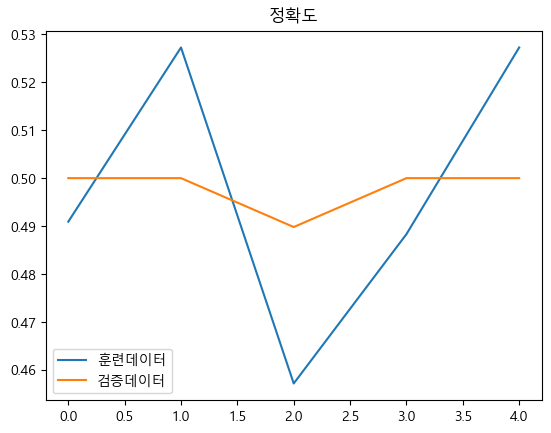

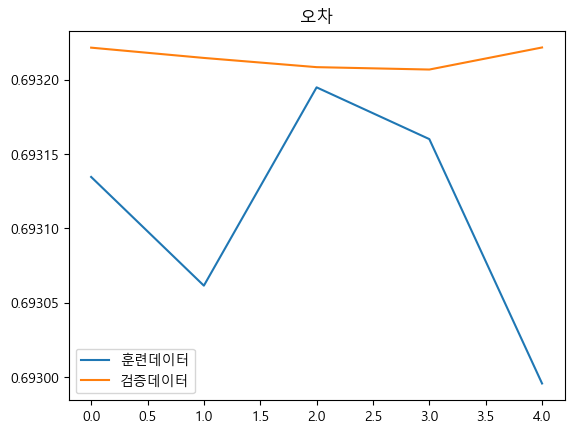

In [14]:
fn = "C:/Windows/Fonts/malgun.ttf"
ff = font_manager.FontProperties(fname = fn).get_name()

pt.rcParams["font.family"] = ff

accuracy = hist.history['accuracy']
val_a = hist.history['val_accuracy']

loss = hist.history['loss']
val_l = hist.history['val_loss']

epochs = range(len(accuracy))

pt.plot(epochs, accuracy, label = "훈련데이터")
pt.plot(epochs, val_a, label = "검증데이터")
pt.legend()
pt.title('정확도')
pt.figure()

pt.plot(epochs, loss, label = "훈련데이터")
pt.plot(epochs, val_l, label = "검증데이터")
pt.legend()
pt.title('오차')

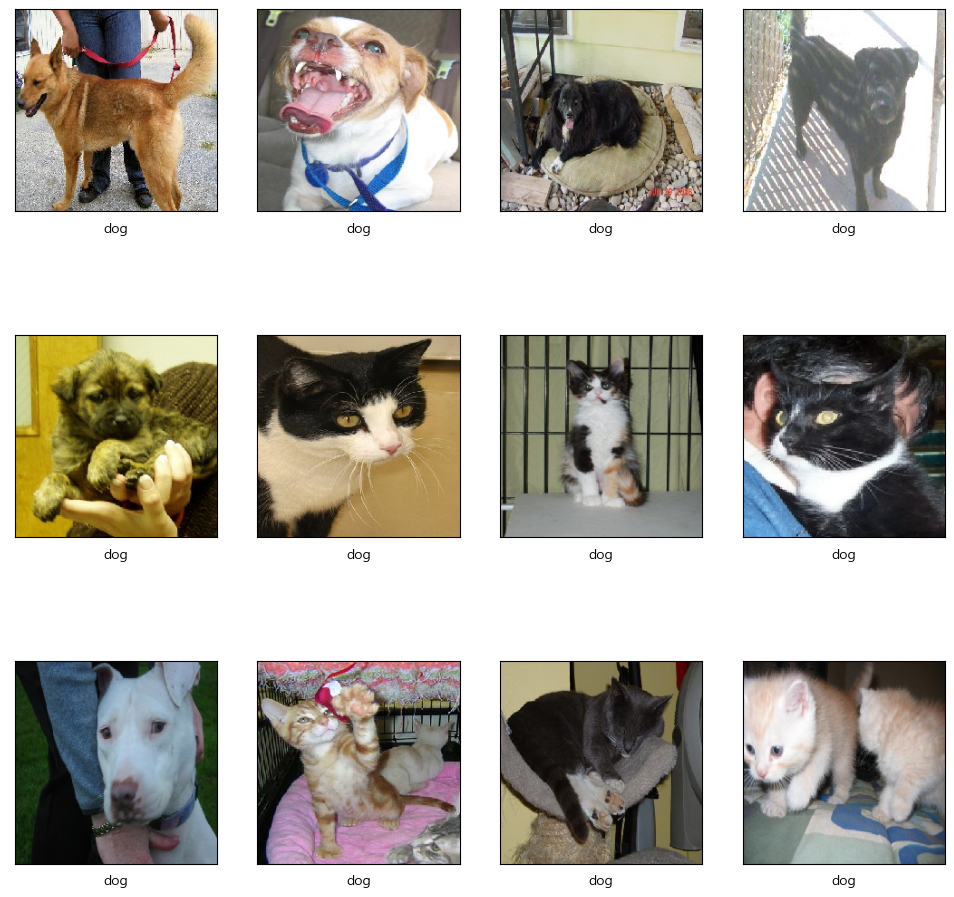

In [21]:
cn = ['cat', 'dog']                          # 클래스 이름
valid, lbl_batch = next(iter(vl_generator))  # 반복자 iter과 반복 next 메서드 적용 => 반복(반복자(리스트 반환 가능 객체))
pred = md.predict(valid)                     # 예측값 추출
pred = np.argmax(pred, axis = 1)             # argmax -> 최대값의 인덱스 번호

fig = pt.figure(figsize = (12,12))

for i in range(12):
    
    pt.subplot(3, 4, i+1)
    pt.imshow(valid[i])
    pt.xticks(ticks = [])
    pt.yticks(ticks = [])
    
    pt.xlabel(cn[pred[i]])
    
# fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)

# for i in range(12):                           # 8번 반복
    
#     x = fig.add_subplot(3, 4, i+1, xticks = [], yticks = [])     # 4개씩 2줄 = 8개 출력
#     x.imshow(valid[i, : ], cmap = pt.cm.gray_r, interpolation = 'nearest')
                                                                 
#     if pred[i] == np.argmax(lbl_batch[i]): x.text(3, 17, cn[pred[i]], color = "yellow", fontsize = 14)
#     else :  x.text(3, 17, cn[pred[i]], color = "red", fontsize = 14)